# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Data Loading
data = pd.read_csv(r'..\data\FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
data.drop(columns=["MODELYEAR","MAKE","MODEL", "TRANSMISSION"], inplace=True)

In [11]:
data[['FUELTYPE']].value_counts()

FUELTYPE
X           514
Z           434
E            92
D            27
dtype: int64

In [12]:
data[['VEHICLECLASS']].value_counts()

VEHICLECLASS            
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
dtype: int64

In [15]:
data.drop(columns=['VEHICLECLASS', 'FUELTYPE'], inplace=True)

In [16]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [18]:
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>]], dtype=object)

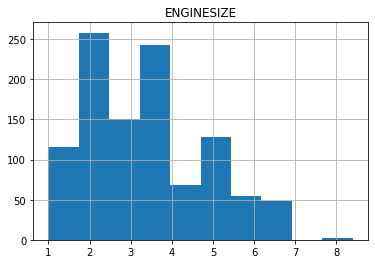

In [20]:
data[['ENGINESIZE']].hist()

array([[<AxesSubplot:title={'center':'CYLINDERS'}>]], dtype=object)

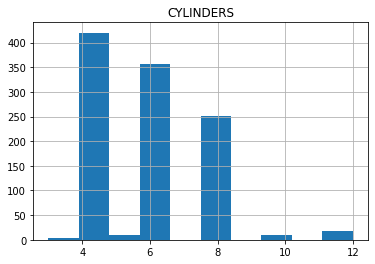

In [21]:
data[['CYLINDERS']].hist()

array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

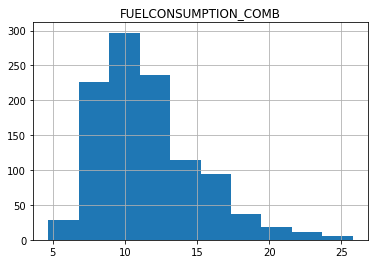

In [22]:
data[['FUELCONSUMPTION_COMB']].hist()

In [23]:
# Feature Selection
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

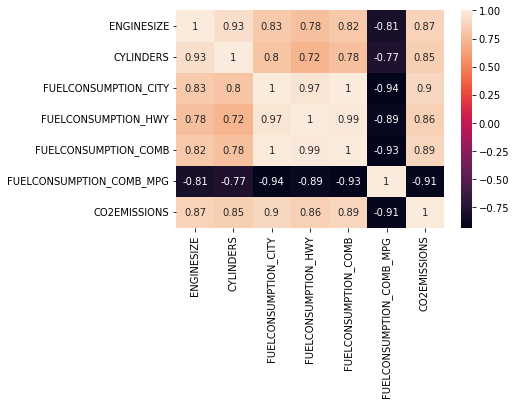

In [25]:
sns.heatmap(data.corr(), annot=True)

In [26]:
data.drop(columns=['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

<AxesSubplot:>

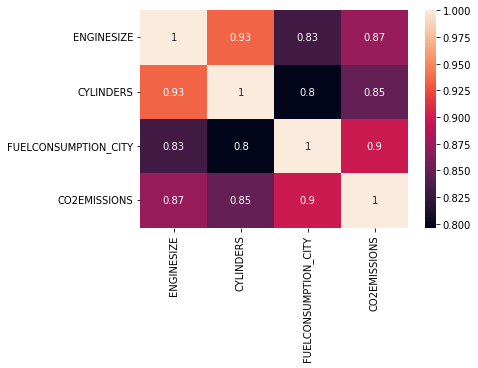

In [27]:
sns.heatmap(data.corr(), annot=True)

In [28]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [29]:
feature = data.drop(columns=['CO2EMISSIONS'])
feature

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2.0,4,9.9
1,2.4,4,11.2
2,1.5,4,6.0
3,3.5,6,12.7
4,3.5,6,12.1
...,...,...,...
1062,3.0,6,13.4
1063,3.2,6,13.2
1064,3.0,6,13.4
1065,3.2,6,12.9


In [30]:
target = data[['CO2EMISSIONS']]
target

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [48]:
# Spliting Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.25, random_state=1)

In [53]:
xtrain.shape, xtest.shape

((800, 3), (267, 3))

In [55]:
ytrain.shape, ytest.shape

((800, 1), (267, 1))

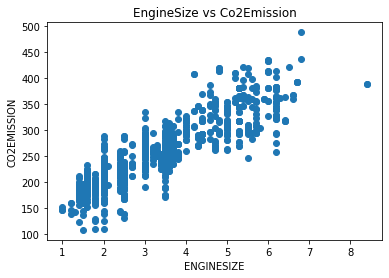

In [67]:
# Choosing Model

plt.scatter(feature.ENGINESIZE ,target.values)
plt.title("EngineSize vs Co2Emission")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [77]:
# Modeling
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']], ytrain.values.ravel())

LinearRegression()

In [78]:
model.intercept_

124.23458594672337

In [79]:
model.coef_

array([39.54874496])

In [84]:
# Prediction
ypred = model.predict(xtest[['ENGINESIZE']])
xtest[['ENGINESIZE']].iloc[0], ypred[0], ytest.values[0]

(ENGINESIZE    3.0
 Name: 133, dtype: float64,
 242.88082083279193,
 array([274], dtype=int64))

In [85]:
ytest.values[0] - ypred[0] 

array([31.11917917])

In [86]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

Absoulute Error:  23.183704964940226
Mean Squarred Error:  947.2869872487785
R2 Score:  0.7633265438534859


In [88]:
model2 = LinearRegression()
model2.fit(xtrain[['CYLINDERS']], ytrain.values.ravel())
# Prediction
ypred = model2.predict(xtest[['CYLINDERS']])

print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

Absoulute Error:  25.14225028771549
Mean Squarred Error:  1060.6489957960428
R2 Score:  0.7350037876879928


In [ ]:
# Linear Regression with FUELCONSUMPTION_CITY